**Most Pupular names registered in New York between 2011 and 2019**

For this simple project I wanted to work with a popular dataset of Kaggle so I can continue my path of improving my python skills. 
At first I focused on knowing the structure of the data so I can detect possible NAs o duplicates. Then, I divided the dataset on the different ethnicities and made subplots graphic, so I can show the most popular name registered on New York between 2011 and 2019. 
After that simple task I tried to make a more dinamic Graphic based on the most popular name for each year of the entire time period.   
Data sourced from: https://data.cityofnewyork.us/Health/Popular-Baby-Names/25th-nujf

In [29]:
import pandas as pd
#Open the dataset
data = pd.read_csv("Popular_Baby_Names.csv")

In [30]:
#Making some explaratory analysis
data.head()

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53


In [31]:
data.columns.tolist()

['Year of Birth', 'Gender', 'Ethnicity', "Child's First Name", 'Count', 'Rank']

In [32]:
#I'm going to rename some columns names for its best use
data.rename(columns={"Year of Birth" : "Year_of_birth", "Child's First Name" : "First_name"}, inplace=True)

In [63]:
data.groupby(data["Year_of_birth"])["Rank"].agg(["min", "max"])

,min,max
Year_of_birth,,
2011,1,97
2012,1,100
2013,1,100
2014,1,102
2015,1,99
2016,1,99
2017,1,97
2018,1,101
2019,1,97


In [33]:
data["Gender"].unique().tolist()

['FEMALE', 'MALE']

In [34]:
data["First_name"].unique().tolist()

['GERALDINE',
 'GIA',
 'GIANNA',
 'GISELLE',
 'GRACE',
 'GUADALUPE',
 'HAILEY',
 'HALEY',
 'HANNAH',
 'HAYLEE',
 'HAYLEY',
 'HAZEL',
 'HEAVEN',
 'HEIDI',
 'HEIDY',
 'HELEN',
 'IMANI',
 'INGRID',
 'IRENE',
 'IRIS',
 'ISABEL',
 'ISABELA',
 'ISABELLA',
 'ISABELLE',
 'ISIS',
 'ITZEL',
 'IZABELLA',
 'JACQUELINE',
 'JADA',
 'JADE',
 'JAELYNN',
 'JAMIE',
 'JANELLE',
 'JASLENE',
 'JASMIN',
 'JASMINE',
 'JAYDA',
 'JAYLA',
 'JAYLAH',
 'JAYLEEN',
 'JAYLENE',
 'JAYLIN',
 'JAYLYN',
 'JAZLYN',
 'JAZMIN',
 'JAZMINE',
 'JENNIFER',
 'JESSICA',
 'JIMENA',
 'JOCELYN',
 'JOHANNA',
 'JOSELYN',
 'JULIA',
 'JULIANA',
 'JULIANNA',
 'JULIET',
 'JULIETTE',
 'JULISSA',
 'KAELYN',
 'KAILEY',
 'KAILYN',
 'KAITLYN',
 'KAMILA',
 'KAREN',
 'KARLA',
 'KATE',
 'KATELYN',
 'KATELYNN',
 'KATHERINE',
 'KATIE',
 'KAYLA',
 'KAYLEE',
 'KAYLEEN',
 'KAYLEIGH',
 'KAYLIE',
 'KAYLIN',
 'KEILY',
 'KELLY',
 'KEYLA',
 'KHLOE',
 'KIARA',
 'KIMBERLY',
 'KRYSTAL',
 'KYLEE',
 'KYLIE',
 'LAILA',
 'LAURA',
 'LAUREN',
 'LAYLA',
 'LEA',
 'L

In [35]:
#for standarize the names and avoid some duplicate data forward, I'm going to generate a .tolower function
data['First_name'] = data['First_name'].str.lower()

In [36]:
data["Ethnicity"].unique()
#Here is when I realized that I have to standarized the ethnicities labels

array(['HISPANIC', 'WHITE NON HISPANIC', 'ASIAN AND PACIFIC ISLANDER',
       'BLACK NON HISPANIC', 'ASIAN AND PACI', 'BLACK NON HISP',
       'WHITE NON HISP'], dtype=object)

In [37]:
#I'm goint to replace "WHITE NON HISP" with "WHITE NON HISPANIC"
data["Ethnicity"] = data["Ethnicity"].replace("WHITE NON HISP", "WHITE NON HISPANIC")

#the same process with the other two ethnicities
data["Ethnicity"] = data["Ethnicity"].replace('ASIAN AND PACI','ASIAN AND PACIFIC ISLANDER')

data["Ethnicity"] = data["Ethnicity"].replace('BLACK NON HISP', 'BLACK NON HISPANIC')

#and i´ll drop duplicates from all my df
data.drop_duplicates(inplace = True)

In [38]:
#I'll divide my dataframe by each of the ethnicities
hispanic = data[data["Ethnicity"] == 'HISPANIC']
white_non_hispanic = data[data['Ethnicity'] == 'WHITE NON HISPANIC']
asian_and_pacific = data[data["Ethnicity"] == 'ASIAN AND PACIFIC ISLANDER']
black_non_hispanic = data[data["Ethnicity"] == 'BLACK NON HISPANIC']

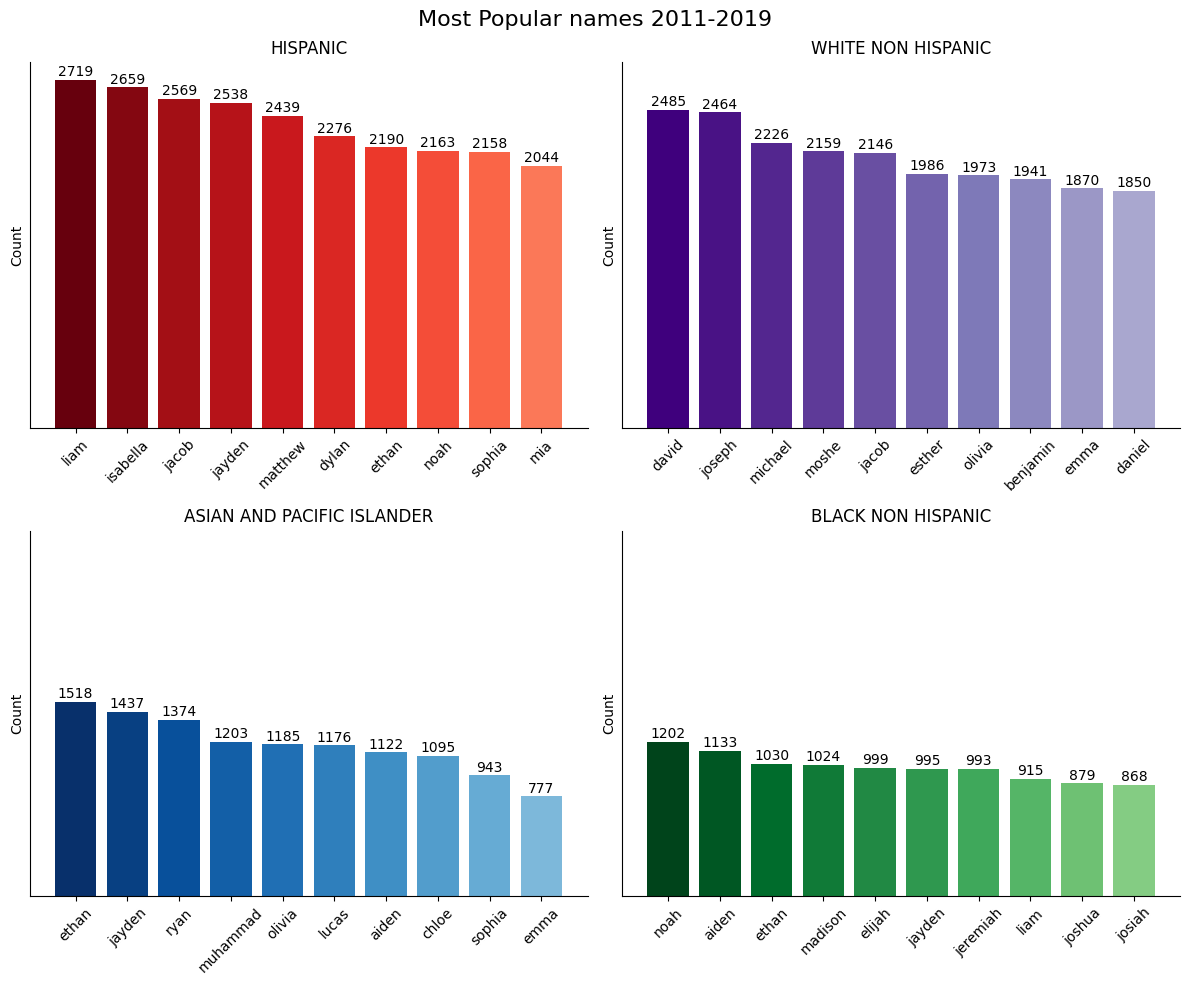

In [39]:
#now my data it is prepared for the plotting
import matplotlib.pyplot as plt
import numpy as np

#DF for each ethnicity

ethnias_dfs = {
    "HISPANIC" : hispanic,
    "WHITE NON HISPANIC" : white_non_hispanic,
    "ASIAN AND PACIFIC ISLANDER" : asian_and_pacific,
    "BLACK NON HISPANIC" : black_non_hispanic
}

#color palette for each ethnicity

palettes = {
    "HISPANIC" : plt.cm.Reds,
    "WHITE NON HISPANIC" : plt.cm.Purples,
    "ASIAN AND PACIFIC ISLANDER" : plt.cm.Blues,
    "BLACK NON HISPANIC" : plt.cm.Greens
}

#create the figure and the axis por each subplot 
fig, axs = plt.subplots(2,2, figsize = (12,10), sharex=False, sharey=True)

#Title
fig.suptitle("Most Popular names 2011-2019", fontsize= 16)

#for each ethnicity, I find the top 10 most popular names, and create the graphic
for i, (ethnia, ethnia_data) in enumerate(ethnias_dfs.items()):
    top_ten_names = ethnia_data.groupby("First_name")["Count"].sum().nlargest(10)

    #I create the graphic for the current ethnicity
    ax = axs[i // 2, i % 2]
    color = palettes[ethnia](np.flipud(np.linspace(0.15, 1,15))) #color palette
    ax.bar(top_ten_names.index, top_ten_names.values, color=color)

    #I eliminate the y axis ticks and the frame
    ax.set_title(f"{ethnia}", fontsize= 12)
    ax.tick_params(axis="x", rotation= 45)
    ax.set_ylabel("Count")
    ax.tick_params(axis= "y", which= "both", left= False, labelleft= False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False) 

    # I add the count on the top of the bars
    for index, value in enumerate(top_ten_names):
        ax.text(index, value + 5, str(value), ha= "center", va= "bottom")

#I adjust the space between the graphics
plt.tight_layout()

#Finally I show the graphic
plt.show()
